In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 


[67 80 71 63 65 72 65 68 58 60 60 59]
[79 84 81 68 63 73 68 56 70 45 54 44]


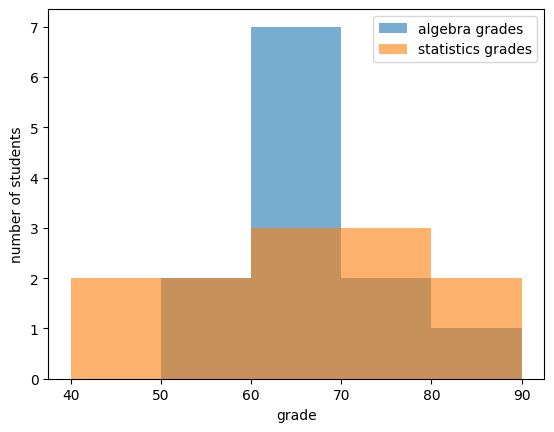

In [2]:
# correlation example 

algebra = np.array([67, 80, 71, 63, 65, 72, 65, 68, 58, 60, 60, 59])
statistics = np.array([79, 84, 81, 68, 63, 73, 68, 56, 70, 45, 54, 44])

print(algebra)
print(statistics)

edges = np.arange(40,100,10)
plt.hist(algebra, bins = edges, alpha = 0.6, label = 'algebra grades')
plt.hist(statistics, bins = edges, alpha = 0.6, label = 'statistics grades')
plt.xlabel('grade')
plt.ylabel('number of students')
plt.legend()
plt.show()

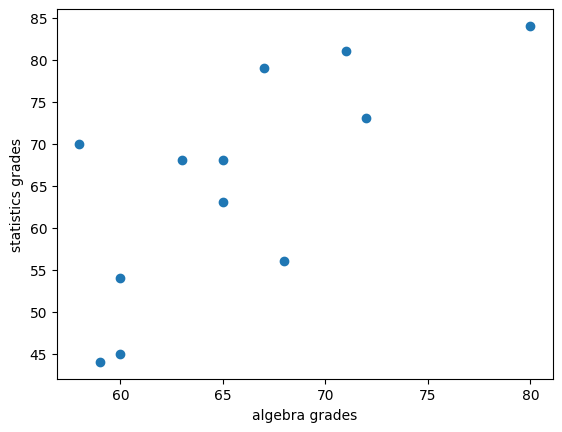

Pearson correlation coefficient: 0.71
Pearson correlation coefficient: 0.71


In [3]:
# presentation scatter plot

plt.scatter(algebra,statistics)
plt.xlabel('algebra grades')
plt.ylabel('statistics grades')
plt.show()

corr_pearson1 = np.corrcoef(algebra,statistics) # correlation matrix
print('Pearson correlation coefficient: {}'.format(round(corr_pearson1[0,1],2)))

corr_pearson2 = stats.pearsonr(algebra,statistics) # pearson coeff + p-value
print('Pearson correlation coefficient: {}'.format(round(corr_pearson2[0],2)))



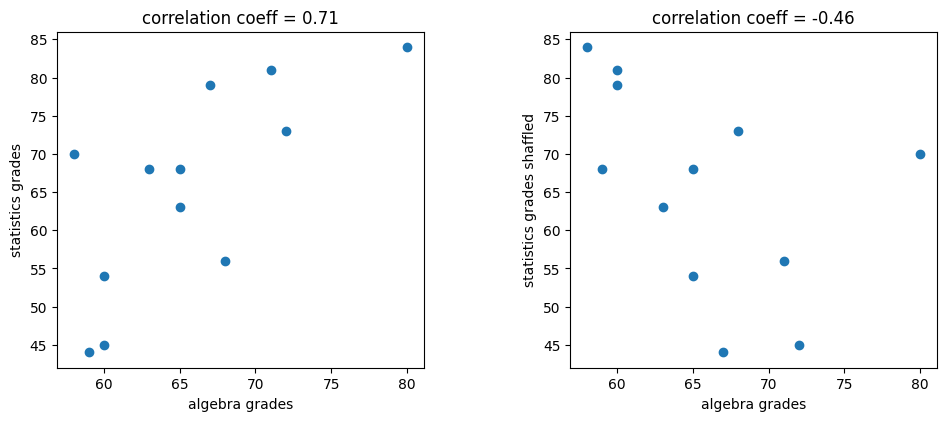

In [6]:
# example of correlate and uncorrelated data

statistis_shaffled = np.random.choice(statistics, len(statistics), replace = False)
corr_pearson_shaffled = np.corrcoef(algebra,statistis_shaffled) 

fig,ax = plt.subplots(1,2)
ax[0].scatter(algebra,statistics)
ax[0].set_xlabel('algebra grades')
ax[0].set_ylabel('statistics grades')
ax[0].set_title('correlation coeff = {}'.format(round(corr_pearson1[0,1],2)))
ax[1].scatter(algebra,statistis_shaffled)
ax[1].set_xlabel('algebra grades')
ax[1].set_ylabel('statistics grades shaffled')
ax[1].set_title('correlation coeff = {}'.format(round(corr_pearson_shaffled[0,1],2)))
fig.subplots_adjust(bottom=0.2, right=1.5, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [7]:
# example 2 linear regression

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/bp.csv'
data = pd.read_csv(url)
print(data)

age = data.age
bp = data.bp

    subj  age   bp
0      1   39  144
1      2   47  180
2      3   45  138
3      4   47  145
4      5   65  162
5      6   46  142
6      7   67  170
7      8   42  124
8      9   67  158
9     10   56  154
10    11   64  162
11    12   56  150
12    13   59  140
13    14   34  110
14    15   42  128
15    16   48  130
16    17   45  135
17    18   17  114
18    19   20  116
19    20   19  124
20    21   36  136
21    22   50  142
22    23   39  120
23    24   21  120
24    25   44  160
25    26   53  158
26    27   63  144
27    28   29  130
28    29   25  125
29    30   69  175


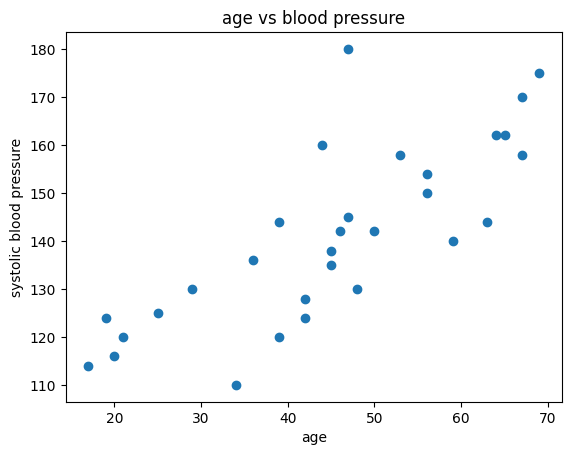

correlation coefficient: 0.79


In [8]:
# example 2 presentation + correlation

plt.scatter(age,bp)
plt.xlabel('age')
plt.ylabel('systolic blood pressure')
plt.title('age vs blood pressure')
plt.show()

print('correlation coefficient: {}'.format(round(np.corrcoef(age,bp)[0,1],2)))


b0 = 97.8782 , b1 = 0.9599


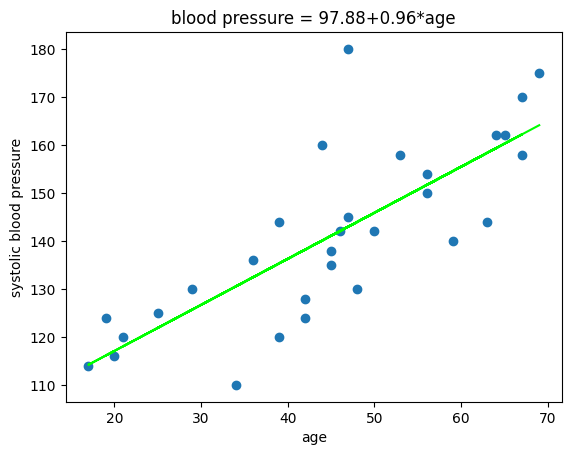

In [9]:
# calculate using formulas
x,y = age,bp

b1 = np.dot((x-x.mean()),(y-y.mean()))/ np.dot((x-x.mean()),(x-x.mean()))
b0 = y.mean()-b1*x.mean()

print('b0 = {} , b1 = {}'.format(round(b0,4),round(b1,4)))

yhat = b0+b1*x

plt.scatter(x,y)
plt.plot(x,yhat, color = 'lime')
plt.xlabel('age')
plt.ylabel('systolic blood pressure')
plt.title('blood pressure = {}+{}*age'.format(round(b0,2),round(b1,2)))
plt.show()


In [10]:
# regression coefficient variance

N = len(x)
SSres = np.dot((y-yhat),(y-yhat))
Syx2 = SSres/(N-2)
Syx = Syx2**0.5
Sb1 = Syx/((x.var(ddof=1)*(N-1))**0.5)
Sb0 = (Syx2/N+(Sb1*x.mean())**2)**0.5

print('Syx2 = {}, Sb1 = {} , Sb0 = {}'.format(round(Syx2,4),round(Sb1,4),round(Sb0,4)))

Syx2 = 138.8192, Sb1 = 0.1431 , Sb0 = 6.8054


In [11]:
# regression coefficient CI and significance

CI_b1 = b1+Sb1*stats.t.ppf([0.025,0.975],N-2)
print('b1 95% CI = [{} , {}]'.format(round(CI_b1[0],4),round(CI_b1[1],4)))

b1_tstat = b1/Sb1
b1_p = 1-stats.t.cdf(abs(b1_tstat),N-2) 
print('b1 p-value = {}'.format(round(b1_p,4)))


b1 95% CI = [0.6668 , 1.2529]
b1 p-value = 0.0


CI 95% for b1 coefficient = [0.7601  1.1595]
p-value for b1 coefficient = 0


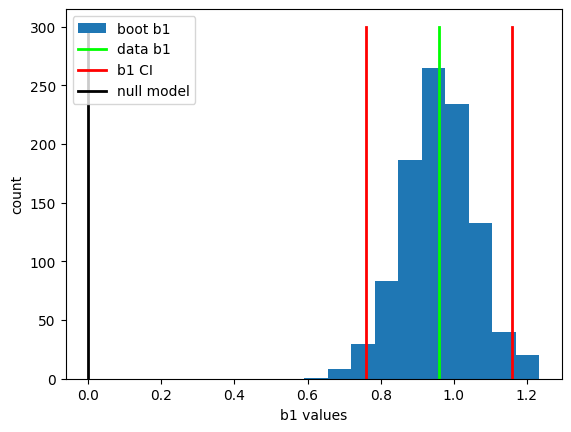

In [15]:
# significance using bootstrap

x,y = np.array(x),np.array(y)
num_boot = 1000
boot_inds = np.random.randint(N, size = (N,num_boot))
boot_x = x[boot_inds]
boot_y = y[boot_inds]
boot_b1 = np.zeros((num_boot,))

for i in range(num_boot):
  boot_b1[i] = np.dot((boot_x[:,i]-boot_x[:,i].mean()),(boot_y[:,i]-boot_y[:,i].mean()))/ np.dot((boot_x[:,i]-boot_x[:,i].mean()),(boot_x[:,i]-boot_x[:,i].mean()))

b1_CI = np.percentile(boot_b1,[2.5,97.5])

print('CI 95% for b1 coefficient = [{}  {}]'.format(round(b1_CI[0],4),round(b1_CI[1],4)))

p_value = sum(boot_b1<=0)/num_boot

print('p-value for b1 coefficient = {}'.format(round(p_value)))

plt.hist(boot_b1, label = 'boot b1')
plt.plot([b1,b1],[0,300], lw = 2, color = 'lime', label = 'data b1')
plt.plot([b1_CI[0],b1_CI[0]],[0,300],lw = 2, color = 'red', label = 'b1 CI')
plt.plot([b1_CI[1],b1_CI[1]],[0,300], lw = 2, color = 'red')
plt.plot([0,0],[0,300], lw = 2, color = 'black', label = 'null model')
plt.legend(loc = 'upper left')
plt.xlabel('b1 values')
plt.ylabel('count')
plt.show()


In [16]:
# effect size for regression model

SSreg = np.dot((yhat-y.mean()),(yhat-y.mean()))
SSres = np.dot((y-yhat),(y-yhat))
SStot = np.dot((y-y.mean()),(y-y.mean()))

R2 = SSreg/SStot

f2 = SSreg/SSres

print('R2 = {} , f2 = {}'.format(round(R2,4),round(f2,4)))


R2 = 0.6166 , f2 = 1.6079


In [17]:
# CI for both coefficients
CI_b1 = b1+Sb1*stats.t.ppf([0.025,0.975],N-2)
print('b1 95% CI = [{} , {}]'.format(round(CI_b1[0],4),round(CI_b1[1],4)))

CI_b0 = b0+Sb0*stats.t.ppf([0.025,0.975],N-2)
print('b0 95% CI = [{} , {}]'.format(round(CI_b0[0],4),round(CI_b0[1],4)))


b1 95% CI = [0.6668 , 1.2529]
b0 95% CI = [83.9379 , 111.8184]


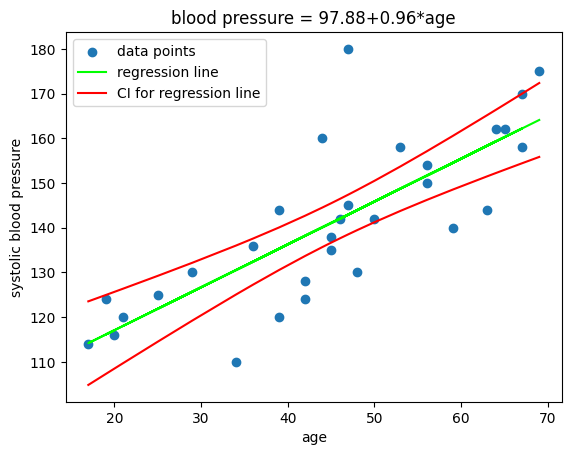

In [19]:
# CI for regression line

Syhat = Syx*( 1/N + ((x-x.mean())**2)/((N-1)*x.var(ddof=1)) )**0.5

CI_low = yhat+stats.t.ppf(0.025,N-2)*Syhat
CI_high = yhat+stats.t.ppf(0.975,N-2)*Syhat

CI_sort_ind = np.argsort(CI_low)

plt.scatter(x,y, label = 'data points')
plt.plot(x,yhat, color = 'lime', label = 'regression line')
plt.plot(x[CI_sort_ind],CI_low[CI_sort_ind], color = 'red', label = 'CI for regression line')
plt.plot(x[CI_sort_ind],CI_high[CI_sort_ind], color = 'red')
plt.xlabel('age')
plt.ylabel('systolic blood pressure')
plt.title('blood pressure = {}+{}*age'.format(round(b0,2),round(b1,2)))
plt.legend(loc = 'upper left')
plt.show()


In [20]:
# linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X, y = np.reshape(np.array(age), (-1,1)), np.array(bp) # X - matrix, y - vector

regr_model = LinearRegression().fit(X, y)

b0 = regr_model.intercept_ 
b1 = regr_model.coef_ 

print(b0, b1)

yhat = regr_model.predict(X)


97.87817438477867 [0.9598632]


In [21]:
# regression model RMSE (Syx), R2

Syx = mean_squared_error(y , yhat)

R2 = r2_score(y , yhat)

print('Syx = {} , R2 = {}'.format(round(Syx**0.5,4),round(R2,4)))

Syx = 11.3826 , R2 = 0.6166


In [22]:
# multivaruate regression example 1

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/city_data.csv'
data = pd.read_csv(url)

print(data)

    unemployment  poverty  murder_rate
0            6.2     16.5         11.2
1            6.4     20.5         13.4
2            9.3     26.3         40.7
3            5.3     16.5          5.3
4            7.3     19.2         24.8
5            5.9     16.5         12.7
6            6.4     20.2         20.9
7            7.6     21.3         35.7
8            4.9     17.2          8.7
9            6.4     14.3          9.6
10           6.0     18.1         14.5
11           7.4     23.1         26.9
12           5.8     19.1         15.7
13           8.6     24.7         36.2
14           6.5     18.6         18.1
15           8.3     24.9         28.9
16           6.7     17.9         14.9
17           8.6     22.4         25.8
18           8.4     20.2         21.7
19           6.7     16.9         25.7


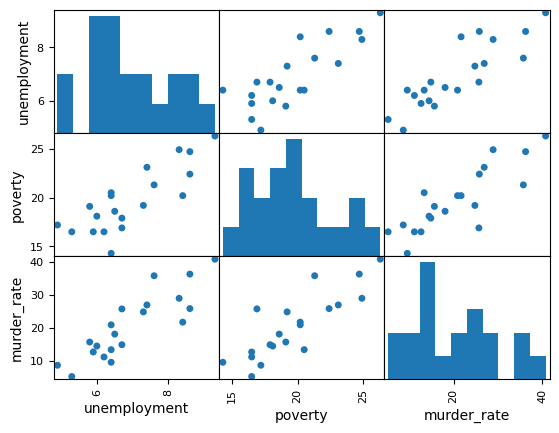

In [23]:
# multivariate model example presentation scatter matrix

pd.plotting.scatter_matrix(data, alpha=1, s=100)
plt.show()

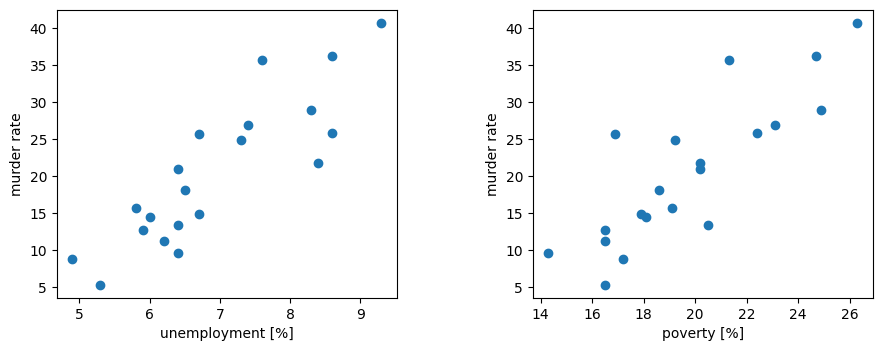

In [24]:
# multivariate model example presentation sactter plot separate variables

fig,ax = plt.subplots(1,2)
ax[0].scatter(data.unemployment,data.murder_rate)
ax[0].set_xlabel('unemployment [%]')
ax[0].set_ylabel('murder rate')
ax[1].scatter(data.poverty,data.murder_rate)
ax[1].set_xlabel('poverty [%]')
ax[1].set_ylabel('murder rate')
fig.subplots_adjust(bottom=0.2, right=1.4, top=0.8, wspace=0.4, hspace=0.4)
plt.show()

<ipython-input-25-7618a492f838>:9: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


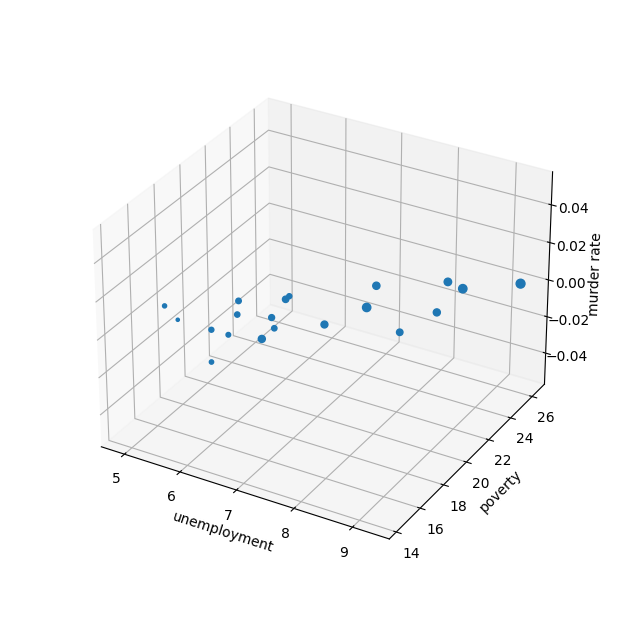

In [25]:
# multivariate model example presentation 3D sactter plot 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(data.unemployment, data.poverty, data.murder_rate, alpha = 1 )
ax.set_xlabel('unemployment')
ax.set_ylabel('poverty')
ax.set_zlabel('murder rate')
ax.dist = 12
plt.show()

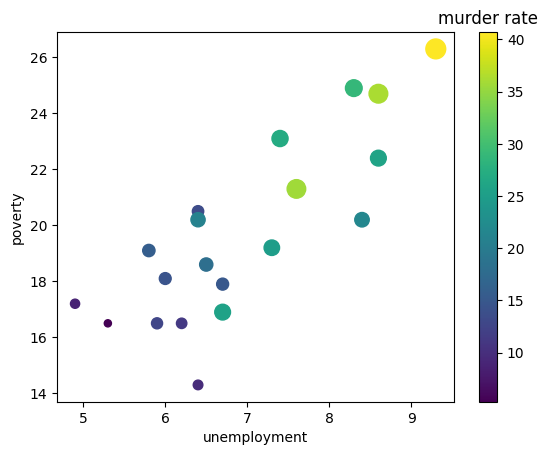

In [26]:
# scatter - z axis in size+color

plt.scatter(data.unemployment, data.poverty, cmap='viridis', c=data.murder_rate, s=data.murder_rate*5, alpha = 1 )
plt.xlabel('unemployment')
plt.ylabel('poverty')
plt.colorbar().ax.set_title('murder rate')
plt.show()


b0 = -34.0725 , b1 = 4.3989 , b2 = 1.2239
Syx2 = 21.6084


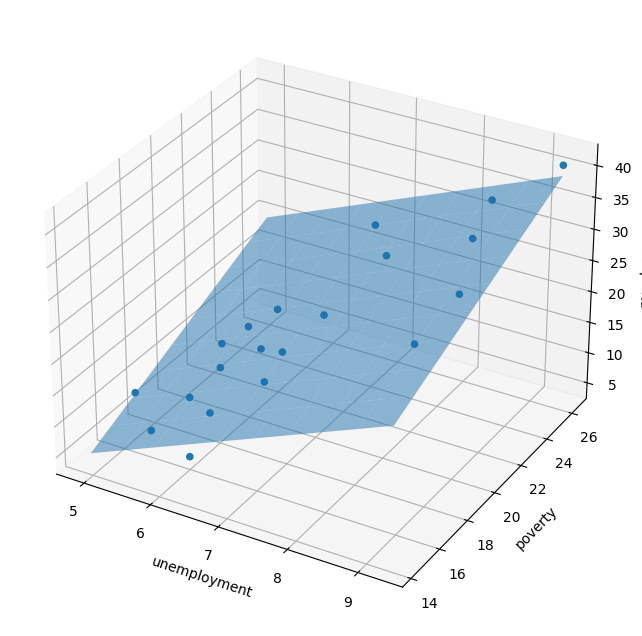

In [28]:
# fit lineab regression model using formulas
y = data.murder_rate

X = np.array([np.ones(len(data.unemployment)), data.unemployment, data.poverty])
X = X.T

# b = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
b = np.linalg.inv(X.T@X)@X.T@y

yhat = np.dot(X,b)

Syx2 = (y-yhat).T@(y-yhat)/(len(y)-3)

print('b0 = {} , b1 = {} , b2 = {}'.format(round(b[0],4),round(b[1],4),round(b[2],4)))
print('Syx2 = {}'.format(round(Syx2,4)))

x1_range = np.linspace(min(X[:,1]), max(X[:,1]), 10)
x2_range = np.linspace(min(X[:,2]), max(X[:,2]), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
yhat_plane = b[0] + b[1]*x1_grid + b[2]*x2_grid

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.unemployment, data.poverty, data.murder_rate, alpha = 1 )
#plt.scatter(data.unemployment, data.poverty, cmap='viridis', c=data.murder_rate, s=data.murder_rate*5, alpha = 0.5 )
ax.plot_surface(x1_grid, x2_grid, yhat_plane, alpha = 0.5 )
ax.set_xlabel('unemployment')
ax.set_ylabel('poverty')
ax.set_zlabel('murder rate')

plt.show()

In [29]:
# effect size

SSres = (y-yhat).T@(y-yhat)
SSreg = (yhat-yhat.mean()).T@(yhat-yhat.mean())
SStot = (y-y.mean()).T@(y-y.mean())

R2 = SSreg/SStot
f2 = SSreg/SSres

print('R2 = {} , f2 = {} '.format(round(R2,4),round(f2,4)))


R2 = 0.802 , f2 = 4.0503 


In [30]:
# using library scikit learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y = data.murder_rate

X = data[['unemployment','poverty']]

regr_model = LinearRegression().fit(X, y)

b0 = regr_model.intercept_ 
b12 = regr_model.coef_ 

print(b0, b12)

yhat = regr_model.predict(X)

R2 = regr_model.score(X, y)

print('R2 = {}'.format(round(R2,4)))


-34.0725334304927 [4.39893583 1.2239307 ]
R2 = 0.802
